In [1]:
# -*- coding: utf-8 -*-
"""Spam.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1zdShzTD9xL0chsyqLu5wzuKYbZuFE2PF
"""


'Spam.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1zdShzTD9xL0chsyqLu5wzuKYbZuFE2PF\n'

# Importing libraries and dataset

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import string
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
data = pd.read_csv('spamham.csv')
data=data[data['Spam/Ham'].isin(['spam','ham'])]
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,36504
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,36507
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,36508
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,36508
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,36508


# data cleaning, feature engineering and Naive Bayes model

Accuracy: 0.989100817438692
Precision: 0.989939024390244
Recall: 0.9881314668289713
F1 Score: 0.9890344197380445
ROC AUC Score: 0.9890958538964134


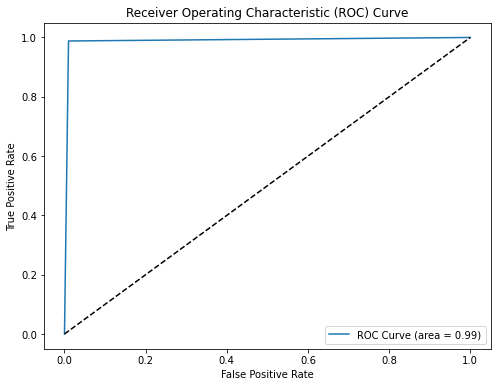

In [3]:
# Naive Bayes model
data['text']=data['Subject']+data['Message']
data = data.dropna()
def remove_punctuations(text):
    temp = str.maketrans('', '', string.punctuation)
    return text.translate(temp)
 
data['text']= data['text'].apply(lambda x: remove_punctuations(x))

def remove_stopwords(text):
    stop_words = stopwords.words('english')
 
    imp_words = []
 
    # Storing the important words
    for word in str(text).split():
        word = word.lower()
 
        if word not in stop_words:
            imp_words.append(word)
 
    output = " ".join(imp_words)
 
    return output
data['text'] = data['text'].apply(lambda text: remove_stopwords(text))
data['Spam/Ham'] = data['Spam/Ham'].map({'ham': 0, 'spam': 1})
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['Spam/Ham'], test_size=0.2, random_state=42)

# Vectorize the  text
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test set
X_test_vectorized = vectorizer.transform(X_test)

# Predict the labels for the test set
y_pred = classifier.predict(X_test_vectorized)

# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing the ROC curve of a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix:
[[3287   33]
 [  39 3247]]


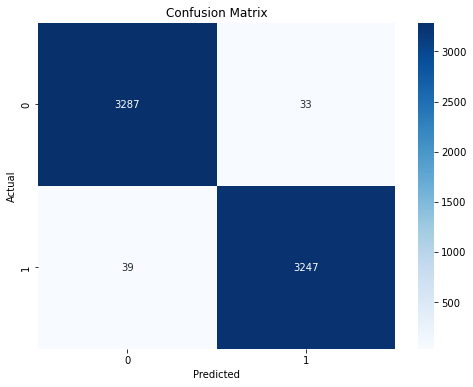

In [4]:
print("Confusion Matrix:")
print(confusion_matrix)
#  Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
X_train

16842    ad hoc timeline review teammark ad hoc team pr...
17429    schedule crawler hourahead failurestart date 1...
12355    beaver creek accommodationsbelow breakdown acc...
23035    enron mg spain meetingdetails meeting anthony ...
27227    mr moses paraiso mr moses paraiso continental ...
                               ...                        
17190    coppermark thanks hard work weekend rog guzman...
6411     mg metals additional areas look atdear lloyd r...
11439    lko 40401nothing give print along receipts app...
864      revision 1 enron actuals may 11 2000correct nu...
16132    fresh way quick relief quick accessat e mart c...
Name: text, Length: 26420, dtype: object

In [9]:
y_train

16842    0
17429    0
12355    0
23035    0
27227    1
        ..
17190    0
6411     0
11439    0
864      0
16132    1
Name: Spam/Ham, Length: 26420, dtype: int64

# Random forest

Accuracy: 0.9848622464426279
Precision: 0.9812688821752266
Recall: 0.9884357881923311
F1 Score: 0.9848392965433597
ROC AUC Score: 0.9848805446985752


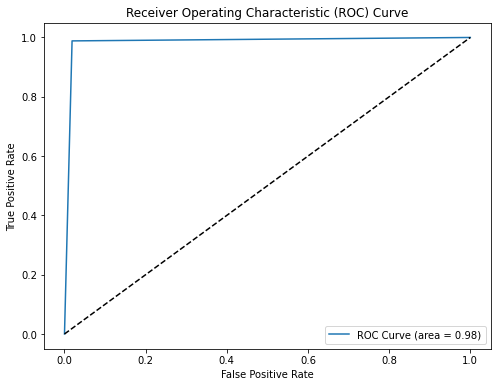

In [14]:
from sklearn.ensemble import RandomForestClassifier
# Build the Random Forest model
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train_vectorized, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test_vectorized)

# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing the ROC curve of a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix:
[[3258   62]
 [  38 3248]]


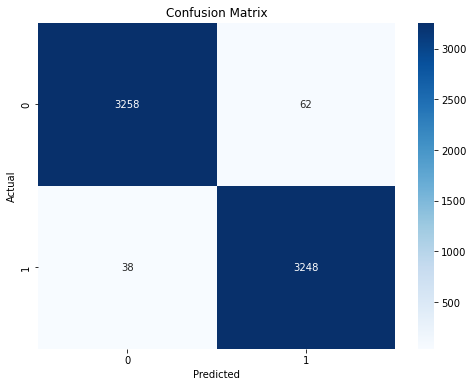

In [15]:
print("Confusion Matrix:")
print(confusion_matrix)
#  Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM

In [ ]:
# Support Vector Machines (SVM) fine tuned
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)
# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing the ROC curve of a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix)
#  Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Build the Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train_vectorized, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test_vectorized)
# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing the ROC curve of a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix)
#  Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Convolution neural network

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# Load the data
data = pd.read_csv('spamham.csv')  # Replace 'spam_data.csv' with the path to your dataset
data['text']=data['Subject']+data['Message']
data = data.dropna()
data['text']= data['text'].apply(lambda x: remove_punctuations(x))
data['text'] = data['text'].apply(lambda text: remove_stopwords(text))
# Convert labels to binary values
label_encoder = LabelEncoder()
data['Spam/Ham'] = label_encoder.fit_transform(data['Spam/Ham'])

# Split the data into features (X) and labels (y)
X = data['text']
y = data['Spam/Ham']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text and convert it into sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to have the same length
max_sequence_length = max([len(seq) for seq in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Build the CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(patience=2, restore_best_weights=True)
model.fit(X_train_padded, y_train, validation_split=0.2, epochs=5, batch_size=10, callbacks=[early_stopping])


# Evaluate the model
y_pred_prob = model.predict(X_test_padded)
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_prob]

In [53]:
# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing the ROC curve of a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Accuracy: 0.5012110202845897
Precision: 0.5012110202845897
Recall: 1.0
F1 Score: 0.6677422607643441
ROC AUC Score: 0.5


ValueError: y_true takes value in {1, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix)
#  Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()